In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [144]:
barcolor = ['olivedrab', 'lightsteelblue', 'steelblue', 'gold', 'pink' ]
legend = ["ILP", "Greedy", 'DQN', 'TD3', 'DDPG']

In [145]:
thres = 50

# Set A

In [146]:
#==========================================Read Data
data = pd.read_csv(f'allocation_results/allocation_for_user500_thres{thres}.csv')
#data['ilp_qoe'] = data['ilp_qoe'].abs() #few results are actually positive but showing negetive
data

,user,server,ilp_user,ilp_time,greedy_user,greedy_time,dqn_user,dqn_time,td3_user,td3_time,ddpg_user,ddpg_time
0,500.0,20.0,189.0,0.494482,171.0,0.032867,246.0,0.005328,246.0,0.006663,246.0,0.006675
1,500.0,20.0,192.0,0.391851,181.0,0.031617,206.0,0.004906,206.0,0.006352,206.0,0.006165
2,500.0,20.0,213.0,0.480009,199.0,0.035842,271.0,0.005670,271.0,0.006827,271.0,0.006067
3,500.0,20.0,215.0,0.512035,200.0,0.033085,268.0,0.005307,268.0,0.006615,268.0,0.007457
4,500.0,20.0,202.0,0.373364,183.0,0.035855,246.0,0.005416,246.0,0.008557,246.0,0.005982
...,...,...,...,...,...,...,...,...,...,...,...,...
195,500.0,80.0,456.0,2.566603,427.0,0.113654,479.0,0.015306,479.0,0.021381,479.0,0.020868
196,500.0,80.0,478.0,1.069944,458.0,0.119536,479.0,0.014649,479.0,0.026269,479.0,0.022132
197,500.0,80.0,463.0,1.176577,445.0,0.109667,472.0,0.014646,472.0,0.019684,472.0,0.018375
198,500.0,80.0,477.0,1.169632,455.0,0.118330,481.0,0.014760,481.0,0.019805,481.0,0.018204


In [147]:
# user_data = data.groupby(['user', 'server'])
user_data = data.groupby('server') #switch between user or server parameter
num_user = user_data.mean()[['ilp_user', 'greedy_user', 'dqn_user', 'td3_user','ddpg_user']]
num_user.index = num_user.index.astype(int) #change index to integer
time = user_data.mean()[['ilp_time', 'greedy_time', 'dqn_time', 'td3_time','ddpg_time']]
time.index = time.index.astype(int)

In [148]:
#compute the log of time for plotting
time[['ilp_time', 'greedy_time', 'dqn_time', 'td3_time','ddpg_time']] = time[['ilp_time', 'greedy_time', 'dqn_time', 'td3_time','ddpg_time']].applymap(lambda x: math.log10(100*x))

In [149]:
num_user

,ilp_user,greedy_user,dqn_user,td3_user,ddpg_user
server,,,,,
20,198.90,181.92,253.38,253.38,253.38
40,334.84,311.12,372.28,372.28,372.28
60,414.54,392.22,430.26,430.26,430.26
80,464.98,448.36,470.28,470.28,470.28


In [150]:
time

,ilp_time,greedy_time,dqn_time,td3_time,ddpg_time
server,,,,,
20,2.440771,0.528684,-0.277248,-0.139401,-0.152658
40,2.572268,0.797257,-0.060054,0.097929,0.078077
60,2.723227,0.957957,0.074000,0.241218,0.217843
80,2.139626,1.071224,0.169195,0.339199,0.314723


In [151]:
#  (num_user['rl_lin_user'] - num_user['ilp_user'])

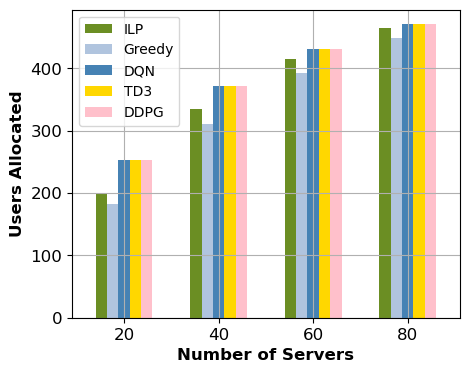

In [152]:
fig, ax = plt.subplots(linewidth=18) #figsize=(10,7) add to increase fig size
num_user.plot(ax=ax, kind='bar', color= barcolor, width= 0.6)
ax.set_ylabel('Users Allocated', fontsize=12, fontweight="bold")

# ax.set_xlabel("Number of Users", fontsize=12, fontweight="bold")
ax.set_xlabel("Number of Servers", fontsize=12, fontweight="bold")
ax.tick_params(axis='both', labelsize=12)

ax.legend(legend, fontsize=10, loc='upper left')
ax.grid(True)
plt.xticks(rotation=0)

fig.set_figwidth(5)
fig.set_figheight(4)


fig.savefig(f"plots/alloc_user_u500_t{thres}.pdf",dpi=100, bbox_inches = "tight")

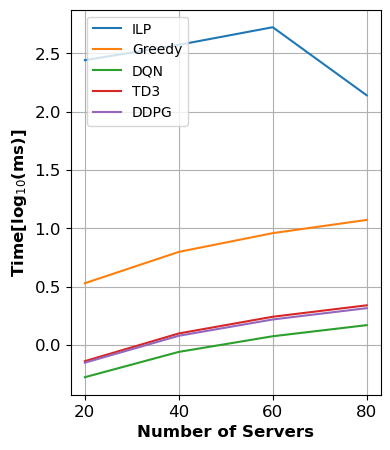

In [153]:
fig1, ax1 = plt.subplots(linewidth=18) #figsize=(10,7) add to increase fig size


plt.locator_params(axis='x', nbins=5)
ax1.plot( 'ilp_time', data=time)
ax1.plot( 'greedy_time', data=time)
ax1.plot( 'dqn_time', data=time)
ax1.plot( 'td3_time', data=time)
ax1.plot( 'ddpg_time', data=time)

# ax1.plot( 'rl_exp_time', data=time, marker='^', linewidth=2, markersize=6,zorder=4, color=barcolor[3])


ax1.set_ylabel('Time[log$_{10}$(ms)]', fontsize=12, fontweight="bold")
# ax1.set_xlabel("Number of Users", fontsize=12, fontweight="bold")
ax1.set_xlabel("Number of Servers", fontsize=12, fontweight="bold")

ax1.tick_params(axis='both', labelsize=12)
ax1.legend(legend, loc='upper right', bbox_to_anchor=(0.4, 1))
ax1.grid(True)
plt.xticks(rotation = 0)

fig1.set_figwidth(4)
fig1.set_figheight(5)

fig1.savefig(f"plots/alloc_time_u500_t{thres}.pdf",dpi=100, bbox_inches = "tight")

In [130]:
sub_data = data.iloc[ : ,[0,1,6,7,8,9,10,11]]
sub_data

,user,server,dqn_user,dqn_time,td3_user,td3_time,ddpg_user,ddpg_time
0,500.0,20.0,246.0,0.005328,246.0,0.006663,246.0,0.006675
1,500.0,20.0,206.0,0.004906,206.0,0.006352,206.0,0.006165
2,500.0,20.0,271.0,0.005670,271.0,0.006827,271.0,0.006067
3,500.0,20.0,268.0,0.005307,268.0,0.006615,268.0,0.007457
4,500.0,20.0,246.0,0.005416,246.0,0.008557,246.0,0.005982
...,...,...,...,...,...,...,...,...
195,500.0,80.0,479.0,0.015306,479.0,0.021381,479.0,0.020868
196,500.0,80.0,479.0,0.014649,479.0,0.026269,479.0,0.022132
197,500.0,80.0,472.0,0.014646,472.0,0.019684,472.0,0.018375
198,500.0,80.0,481.0,0.014760,481.0,0.019805,481.0,0.018204


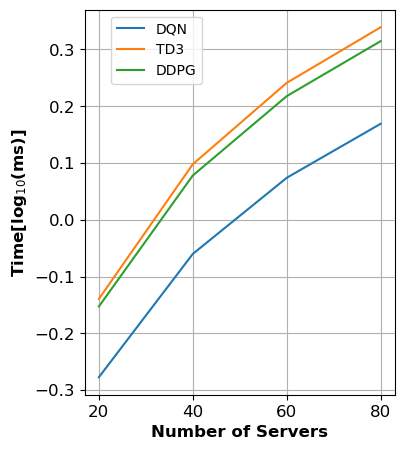

In [131]:
legend = ['DQN', 'TD3', 'DDPG']
user_sub_data = sub_data.groupby('server') #switch between user or server parameter

num_user = user_sub_data.mean()[['dqn_user', 'td3_user','ddpg_user']]
num_user.index = num_user.index.astype(int) #change index to integer

time = user_sub_data.mean()[['dqn_time', 'td3_time','ddpg_time']]
time.index = time.index.astype(int)

#compute the log of time for plotting
time[['dqn_time', 'td3_time','ddpg_time']] = time[['dqn_time', 'td3_time','ddpg_time']].applymap(lambda x: math.log10(100*x))

fig1, ax1 = plt.subplots(linewidth=18) #figsize=(10,7) add to increase fig size

plt.locator_params(axis='x', nbins=5)
ax1.plot( 'dqn_time', data=time)
ax1.plot( 'td3_time', data=time)
ax1.plot( 'ddpg_time', data=time)

# ax1.plot( 'rl_exp_time', data=time, marker='^', linewidth=2, markersize=6,zorder=4, color=barcolor[3])


ax1.set_ylabel('Time[log$_{10}$(ms)]', fontsize=12, fontweight="bold")
ax1.set_xlabel("Number of Servers", fontsize=12, fontweight="bold")

ax1.tick_params(axis='both', labelsize=12)
ax1.legend(legend, loc='upper right', bbox_to_anchor=(0.4, 1))
ax1.grid(True)
plt.xticks(rotation = 0)

fig1.set_figwidth(4)
fig1.set_figheight(5)

fig1.savefig(f"plots/DRL_time_u500_t{thres}.pdf",dpi=100, bbox_inches = "tight")

# Set B

In [132]:
#==========================================Read Data
data = pd.read_csv(f'allocation_results/allocation_for_server50_thres{thres}.csv')
#data['ilp_qoe'] = data['ilp_qoe'].abs() #few results are actually positive but showing negetive
data

,user,server,ilp_user,ilp_time,greedy_user,greedy_time,dqn_user,dqn_time,td3_user,td3_time,ddpg_user,ddpg_time
0,100.0,50.0,79.0,0.277916,79.0,0.014201,79.0,0.009815,79.0,0.011900,79.0,0.009985
1,100.0,50.0,81.0,0.114587,81.0,0.016471,81.0,0.010226,81.0,0.012035,81.0,0.012636
2,100.0,50.0,76.0,0.112707,76.0,0.013562,76.0,0.009957,76.0,0.010985,76.0,0.011405
3,100.0,50.0,84.0,0.126902,84.0,0.014713,84.0,0.009828,84.0,0.011464,84.0,0.011461
4,100.0,50.0,79.0,0.129427,79.0,0.013858,79.0,0.010313,79.0,0.011268,79.0,0.009982
...,...,...,...,...,...,...,...,...,...,...,...,...
295,500.0,50.0,367.0,0.747484,350.0,0.074916,378.0,0.009209,378.0,0.014534,378.0,0.013794
296,500.0,50.0,372.0,0.691128,348.0,0.072655,394.0,0.009173,394.0,0.012999,394.0,0.013950
297,500.0,50.0,357.0,0.851538,327.0,0.069362,403.0,0.009372,403.0,0.013814,403.0,0.014436
298,500.0,50.0,400.0,25.498679,367.0,0.075612,430.0,0.009374,430.0,0.012724,430.0,0.011597


In [133]:
# user_data = data.groupby(['user', 'server'])
user_data = data.groupby('user') #switch between user or server parameter
num_user = user_data.mean()[['ilp_user', 'greedy_user', 'dqn_user', 'td3_user','ddpg_user']]
num_user.index = num_user.index.astype(int)
time = user_data.mean()[['ilp_time', 'greedy_time', 'dqn_time', 'td3_time','ddpg_time']]
time.index = time.index.astype(int)

In [134]:
#compute the log of time for plotting
time[['ilp_time', 'greedy_time', 'dqn_time', 'td3_time','ddpg_time']] = time[['ilp_time', 'greedy_time', 'dqn_time', 'td3_time','ddpg_time']].applymap(lambda x: math.log10(100*x))

In [135]:
#  (num_user['rl_lin_user'] - num_user['ilp_user'])

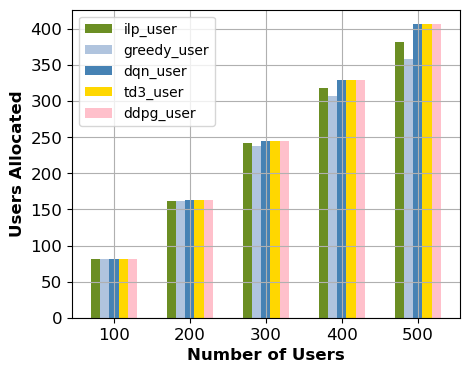

In [136]:
fig, ax = plt.subplots(linewidth=18) #figsize=(10,7) add to increase fig size
num_user.plot(ax=ax, kind='bar', color= barcolor, width= 0.6)
ax.set_ylabel('Users Allocated', fontsize=12, fontweight="bold")

# ax.set_xlabel("Number of Users", fontsize=12, fontweight="bold")
ax.set_xlabel("Number of Users", fontsize=12, fontweight="bold")
ax.tick_params(axis='both', labelsize=12)

ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=0)


fig.set_figwidth(5)
fig.set_figheight(4)

fig.savefig(f"plots/alloc_user_s50_t{thres}.pdf",dpi=100, bbox_inches = "tight")

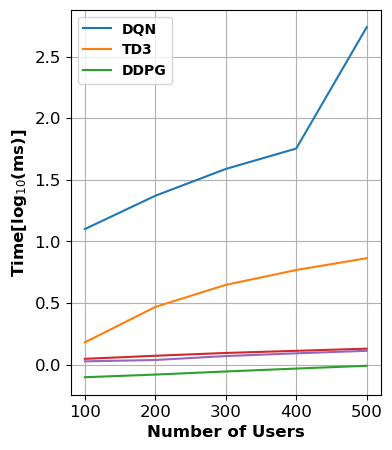

In [137]:
fig1, ax1 = plt.subplots(linewidth=18) #figsize=(10,7) add to increase fig size


plt.locator_params(axis='x', nbins=5)
ax1.plot( 'ilp_time', data=time)
ax1.plot( 'greedy_time', data=time)
ax1.plot( 'dqn_time', data=time)
ax1.plot( 'td3_time', data=time)
ax1.plot( 'ddpg_time', data=time)

ax1.set_ylabel('Time[log$_{10}$(ms)]', fontsize=12, fontweight="bold")
# ax1.set_xlabel("Number of Users", fontsize=12, fontweight="bold")
ax1.set_xlabel("Number of Users", fontsize=12, fontweight="bold")

ax1.tick_params(axis='both', labelsize=12)
ax1.legend(legend, loc='upper left', bbox_to_anchor=(0, 1), prop = {'weight':'bold', 'size':  10})
ax1.grid(True)
plt.xticks(rotation = 0)

fig1.set_figwidth(4)
fig1.set_figheight(5)

fig1.savefig(f"plots/alloc_time_s50_t{thres}.pdf",dpi=100, bbox_inches = "tight")

In [138]:
sub_data = data.iloc[ : ,[0,1,6,7,8,9,10,11]]
sub_data

,user,server,dqn_user,dqn_time,td3_user,td3_time,ddpg_user,ddpg_time
0,100.0,50.0,79.0,0.009815,79.0,0.011900,79.0,0.009985
1,100.0,50.0,81.0,0.010226,81.0,0.012035,81.0,0.012636
2,100.0,50.0,76.0,0.009957,76.0,0.010985,76.0,0.011405
3,100.0,50.0,84.0,0.009828,84.0,0.011464,84.0,0.011461
4,100.0,50.0,79.0,0.010313,79.0,0.011268,79.0,0.009982
...,...,...,...,...,...,...,...,...
295,500.0,50.0,378.0,0.009209,378.0,0.014534,378.0,0.013794
296,500.0,50.0,394.0,0.009173,394.0,0.012999,394.0,0.013950
297,500.0,50.0,403.0,0.009372,403.0,0.013814,403.0,0.014436
298,500.0,50.0,430.0,0.009374,430.0,0.012724,430.0,0.011597


In [139]:
legend = ['DQN', 'TD3', 'DDPG']
user_sub_data = sub_data.groupby('user') #switch between user or server parameter

num_user = user_sub_data.mean()[['dqn_user', 'td3_user','ddpg_user']]
num_user.index = num_user.index.astype(int) #change index to integer

time = user_sub_data.mean()[['dqn_time', 'td3_time','ddpg_time']]
time.index = time.index.astype(int)

#compute the log of time for plotting
time[['dqn_time', 'td3_time','ddpg_time']] = time[['dqn_time', 'td3_time','ddpg_time']].applymap(lambda x: math.log10(100*x))



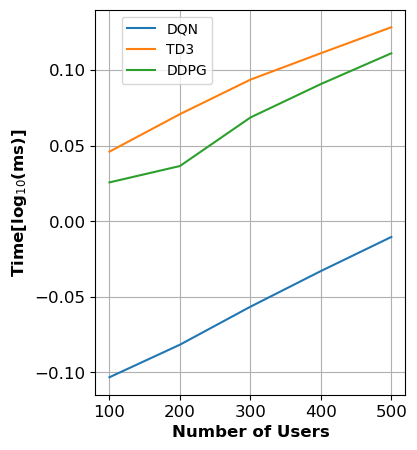

In [140]:
fig1, ax1 = plt.subplots(linewidth=18) #figsize=(10,7) add to increase fig size

plt.locator_params(axis='x', nbins=5)
ax1.plot( 'dqn_time', data=time)
ax1.plot( 'td3_time', data=time)
ax1.plot( 'ddpg_time', data=time)

# ax1.plot( 'rl_exp_time', data=time, marker='^', linewidth=2, markersize=6,zorder=4, color=barcolor[3])


ax1.set_ylabel('Time[log$_{10}$(ms)]', fontsize=12, fontweight="bold")
# ax1.set_xlabel("Number of Users", fontsize=12, fontweight="bold")
ax1.set_xlabel("Number of Users", fontsize=12, fontweight="bold")

ax1.tick_params(axis='both', labelsize=12)
ax1.legend(legend, loc='upper right', bbox_to_anchor=(0.4, 1))
ax1.grid(True)
plt.xticks(rotation = 0)

fig1.set_figwidth(4)
fig1.set_figheight(5)

fig1.savefig(f"plots/DRL_time_u500_t{thres}.pdf",dpi=100, bbox_inches = "tight")